# 画像の足し算

画像の足し算は，OpenCVの関数 cv2.add() を使う，もしくはNumpyの演算によって res = img1 + img2 とする。ここでimg2はスカラーか、2つの画像(img1, img2)がビット数もデータ型も同じでなければならない。

Note OpenCVの足し算とNumpyの足し算は違いがある。OpenCVの cv2.add() 関数を使った場合，上限値を超える和の値は res = min(img1+img2, MAX)のように打ち切られる．それに対し、Numpyの足し算は和に対し、MAXでモジュロを取った値になる: res = (img1+img2) mod MAX

例によって違いを理解しよう:

In [2]:
import numpy as np
import cv2 # OpenCV-Python
import pandas as pd
from pandas import Series
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x,y)) # 250+10 = 260 => 255

[[255]]


In [3]:
print(x+y)         # 250+10 = 260 % 256 = 4

[4]


この現象は2枚の画像を足し合わせた時によりはっきり確認できる．OpenCVの足し算を使った方がよい結果になることが多いので、OpenCVの関数を使う方が良い．



# 画像の混合(ブレンド)

addWeighted：2つの配列の重み付き和を求めます．

パラメタ:	

src1 – 1 番目の入力配列．

alpha – 1 番目の配列要素に対する重み．

src2 – src1 と同じサイズ，同じ型である 2 番目の入力配列．

beta – 2 番目の配列要素に対する重み．

dst – src1 と同じサイズ，同じ型の出力配列．

gamma – スカラ，それぞれの和に加えられます．


<font color="red">課題1：エラーが出ないようにしよう</font>

<font color="red">課題2：閾値を変えてみよう</font>

In [3]:
img1 = cv2.imread('../../img/j.png')
img2 = cv2.imread('../../img/box.png')

dst = cv2.addWeighted(img1,0.9,img2,0.3,0)

plt.plot(), plt.imshow(dst)
plt.show()

error: /Users/jenkins/miniconda/1/x64/conda-bld/conda_1486587097465/work/opencv-3.1.0/modules/core/src/arithm.cpp:639: error: (-209) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function arithm_op


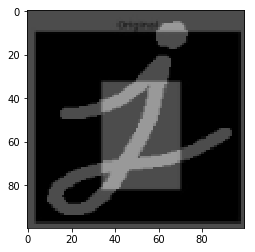

In [36]:
dst = cv2.addWeighted(img1,0.3,img2,0.3,0)

plt.plot(), plt.imshow(dst)
plt.show()

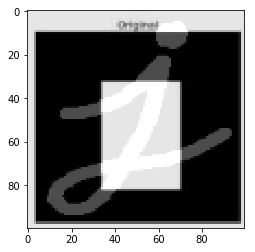

In [37]:
dst = cv2.addWeighted(img1,0.3,img2,0.9,0)

plt.plot(), plt.imshow(dst)
plt.show()

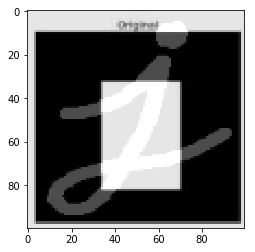

In [38]:
dst = cv2.addWeighted(img1,0.3,img2,0.9,0) #ガンマ値はガンマ補正の値。大きくすると明るく(白っぽく)　なる。

plt.plot(), plt.imshow(dst)
plt.show()

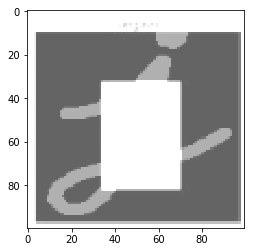

In [39]:
dst = cv2.addWeighted(img1,0.3,img2,0.9,100) #ガンマ値はガンマ補正の値。大きくすると明るく(白っぽく)　なる。

plt.plot(), plt.imshow(dst)
plt.show()

# ビット単位の処理

OpenCVが提供するビット単位の処理には AND, OR, NOT とXORがある．これらの関数は，(後に紹介するように)画像の中から特定の領域を抽出する時や矩形「でない」形の注目領域を定義したり処理する時などに特に役に立つ．以下の例では画像の特定領域だけを変える方法を示す．

この例では画像上にOpenCVのロゴを表示したい．2枚の画像を単純に足し算するとロゴの色が変わってしまうし，混合するとロゴが透けてしまう。ここではロゴを元画像を保ったまま半透明表示させたい．ロゴの領域が長方形であれば注目領域(ROI)を指定するだけで済むが，OpenCVのロゴはそうではない． そこでこのような時はビット単位での処理を用いる: (コード, messi5.jpg, opencv_logo.png)



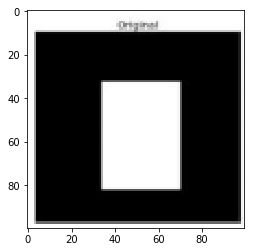

In [49]:
img1 = cv2.imread('../../img/j.png')
img2 = cv2.imread('../../img/box.png')
size = (100,100)
img1 = cv2.resize(img1, size)
img2 = cv2.resize(img2, size)

plt.plot(), plt.imshow(img2)
plt.show()

<font color="red">課題3：１個づつ何が起きてるのか追ってみよう</font>

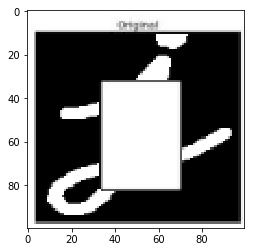

In [5]:
img1 = cv2.imread('../../img/j.png')
img2 = cv2.imread('../../img/box.png')
size = (100,100)
img1 = cv2.resize(img1, size)
img2 = cv2.resize(img2, size)

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask) #配列の各ビットを反転します．
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv) #2つの配列同士，あるいは配列とスカラの ビット毎の論理積を求めます．
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask) #2つの配列同士，あるいは配列とスカラの ビット毎の論理積を求めます．
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst


plt.plot(), plt.imshow(img1)
plt.show()